In [1]:
probDict = {
    "VISp" : "PrimaryVisualCortex (V1)",
    "VISl" : "LateroMedial (LM)",
    "VISrl" : "RostroLateral (RL)",
    "VISal" : "AnteroLateral (AL)",
    "VISpm" : "PosteroMedial (PM)",
    "VISam" : "AnteroMedial (AM)",
    "LP" : "LateralPosteriorNuc (LP)",
    "LGd" : "LateralGeniculateNuc (LGn)",
}

In [2]:
import os
import numpy as np
from numpy_da import DynamicArray


In [3]:
felineV1DataArray  = DynamicArray(shape=(52,13,95))
felineLMDataArray  = DynamicArray(shape=(40,13,95))
felineRLDataArray  = DynamicArray(shape=(10,13,95))
felineALDataArray  = DynamicArray(shape=(9,13,95))
felinePMDataArray  = DynamicArray(shape=(18,13,95))
felineAMDataArray  = DynamicArray(shape=(37,13,95))
felineLPDataArray  = DynamicArray(shape=(28,13,95))
felineLGnDataArray = DynamicArray(shape=(71,13,95))

treeV1DataArray  = DynamicArray(shape=(52,14,95))
treeLMDataArray  = DynamicArray(shape=(40,14,95))
treeRLDataArray  = DynamicArray(shape=(10,14,95))
treeALDataArray  = DynamicArray(shape=(9,14,95))
treePMDataArray  = DynamicArray(shape=(18,14,95))
treeAMDataArray  = DynamicArray(shape=(37,14,95))
treeLPDataArray  = DynamicArray(shape=(28,14,95))
treeLGnDataArray = DynamicArray(shape=(71,14,95))

In [4]:
for session in wholeSessions:
    sessionPath = os.path.join(dataPath, session + '/feline_data')
    sessionData = os.listdir(sessionPath)
    for np_data in sessionData:
        npPath      = os.path.join(sessionPath, np_data)
        data        = np.load(npPath)
        data        = np.reshape(data, (data.shape[1], data.shape[0], data.shape[2]))
        probeRegion = np_data.split("_")[-1].split(".")[0]
        if probeRegion == "VISp":
            felineV1DataArray.append(data[:, 0:13, :])
        elif probeRegion == "VISl":
            felineLMDataArray.append(data[:, 0:13, :])
        elif probeRegion == "VISrl":
            felineRLDataArray.append(data[:, 0:13, :])
        elif probeRegion == "VISal":
            felineALDataArray.append(data[:, 0:13, :])
        elif probeRegion == "VISpm":
            felinePMDataArray.append(data[:, 0:13, :])
        elif probeRegion == "VISam":
            felineAMDataArray.append(data[:, 0:13, :])
        elif probeRegion == "LP":
            felineLPDataArray.append(data[:, 0:13, :])
        elif probeRegion == "LGd":
            felineLGnDataArray.append(data[:, 0:13, :])

In [5]:
for session in wholeSessions:
    sessionPath = os.path.join(dataPath, session + '/tree_data')
    sessionData = os.listdir(sessionPath)
    for np_data in sessionData:
        npPath      = os.path.join(sessionPath, np_data)
        data        = np.load(npPath)
        data        = np.reshape(data, (data.shape[1], data.shape[0], data.shape[2]))
        probeRegion = np_data.split("_")[-1].split(".")[0]
        if probeRegion == "VISp":
            treeV1DataArray.append(data)
        elif probeRegion == "VISl":
            treeLMDataArray.append(data)
        elif probeRegion == "VISrl":
            treeRLDataArray.append(data)
        elif probeRegion == "VISal":
            treeALDataArray.append(data)
        elif probeRegion == "VISpm":
            treePMDataArray.append(data)
        elif probeRegion == "VISam":
            treeAMDataArray.append(data)
        elif probeRegion == "LP":
            treeLPDataArray.append(data)
        elif probeRegion == "LGd":
            treeLGnDataArray.append(data)

In [6]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import os

def svm_and_plot_iters(feline_data, tree_data, probe, n_iter):
    feline_labels = np.zeros(feline_data.shape[0]) 
    tree_labels   = np.ones(tree_data.shape[0])
    total_data    = np.concatenate((feline_data, tree_data), axis=0)
    total_labels  = np.concatenate((feline_labels, tree_labels), axis=0)

    iters    = n_iter
    accuracy = np.zeros((total_data.shape[2], iters))

    for iter in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(total_data, total_labels, test_size=0.3, stratify=total_labels)
        for t in range(accuracy.shape[0]):
            clf                  = make_pipeline(SVC(kernel='linear', C=2.5))
            clf.fit(X_train[:, :, t], y_train)
            y_pred               = clf.predict(X_test[:, :, t])
            accuracy[t, iter] = accuracy_score(y_test, y_pred)
        
    acc = accuracy
    accuracy = np.mean(acc, axis=1)
    error    = np.std(acc, axis=1) / np.sqrt(iters)
    time     = np.arange(-200, 750, 10)
    
    sns.set()
    plt.figure(figsize=(10, 5))
    plt.plot(time, accuracy, linewidth = 2)
    plt.fill_between(time, accuracy-error, accuracy+error, alpha=0.5)
    plt.xlabel('time (ms)')
    plt.ylabel('accuracy')
    plt.ylim(0, 1)
    plt.axvline(x = 0, ymin=0, ymax=1, color = 'r', label = 'stimuli onset', linestyle='dashed')
    plt.legend()
    plt.title('Accuracy over time for ' + probe)
    plt.show()

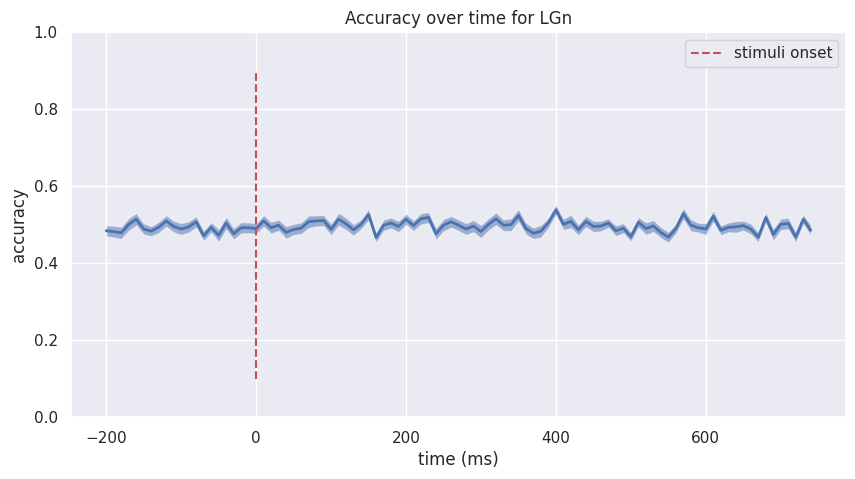

In [34]:
felineData   = felineLGnDataArray
treeData     = treeLGnDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='LGn', n_iter=100)

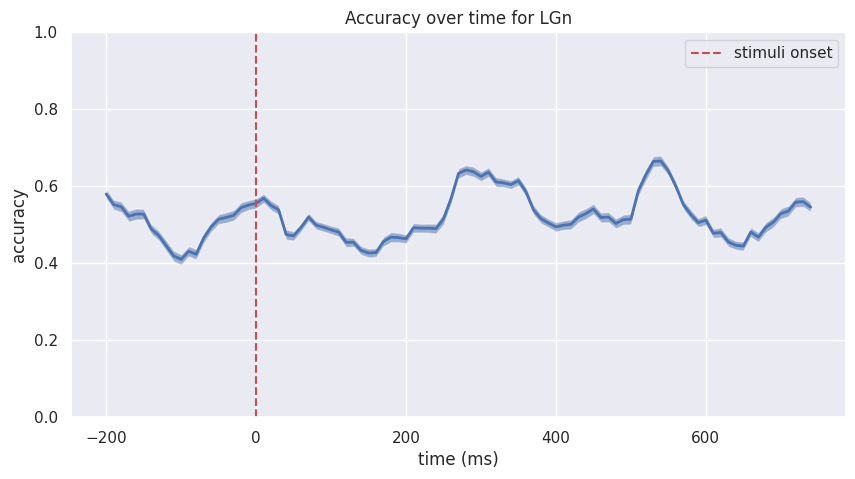

In [29]:
felineData   = felineLGnDataArray
treeData     = treeLGnDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='LGn', n_iter=100)

In [35]:
felineData   = felineLPDataArray
treeData     = treeLPDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='LP', n_iter=100)

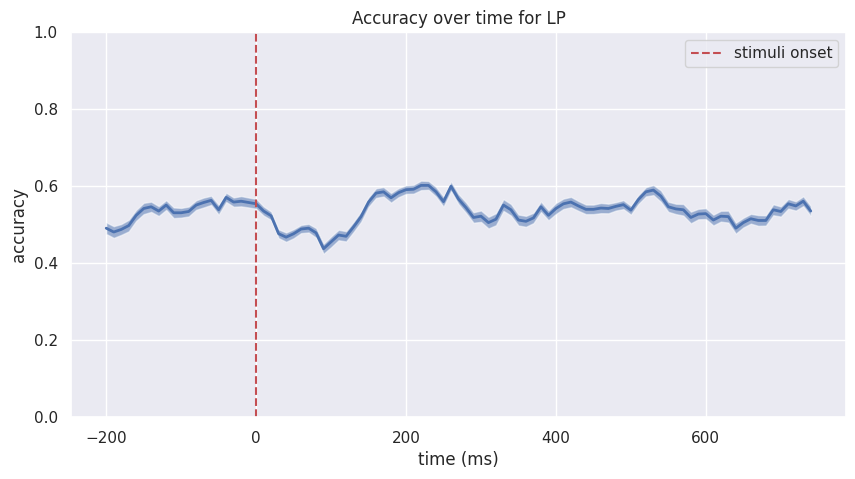

In [28]:
felineData   = felineLPDataArray
treeData     = treeLPDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='LP', n_iter=100)

In [ ]:
felineData   = felineAMDataArray
treeData     = treeAMDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='AM', n_iter=100)

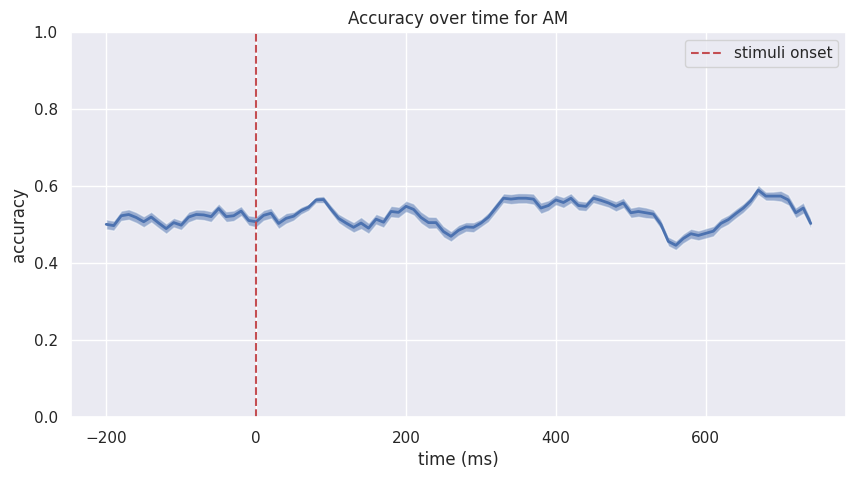

In [27]:
felineData   = felineAMDataArray
treeData     = treeAMDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='AM', n_iter=100)

In [ ]:
felineData   = felinePMDataArray
treeData     = treePMDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='PM', n_iter=100)

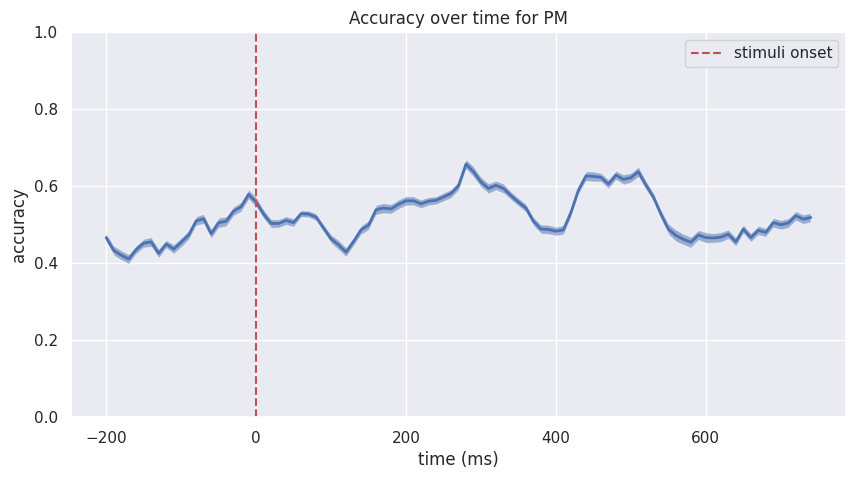

In [26]:
felineData   = felinePMDataArray
treeData     = treePMDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='PM', n_iter=100)

In [ ]:
felineData   = felineALDataArray
treeData     = treeALDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='AL', n_iter=100)

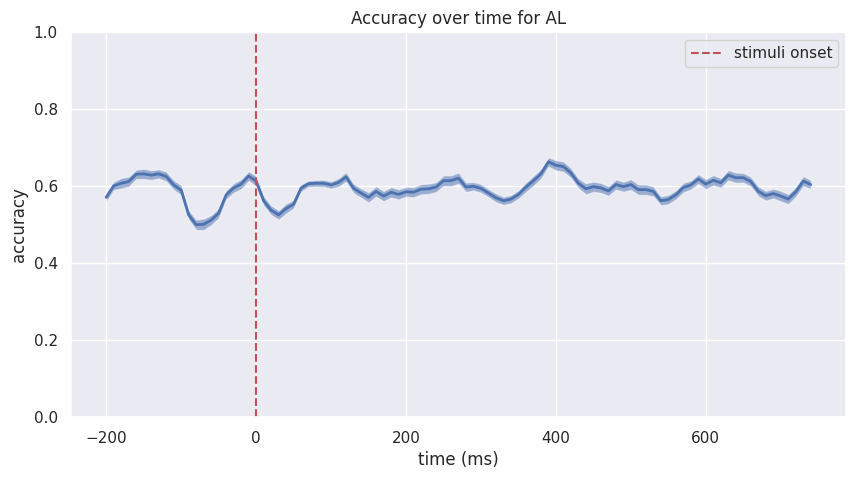

In [25]:
felineData   = felineALDataArray
treeData     = treeALDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='AL', n_iter=100)

In [ ]:
felineData   = felineRLDataArray
treeData     = treeRLDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='RL', n_iter=100)

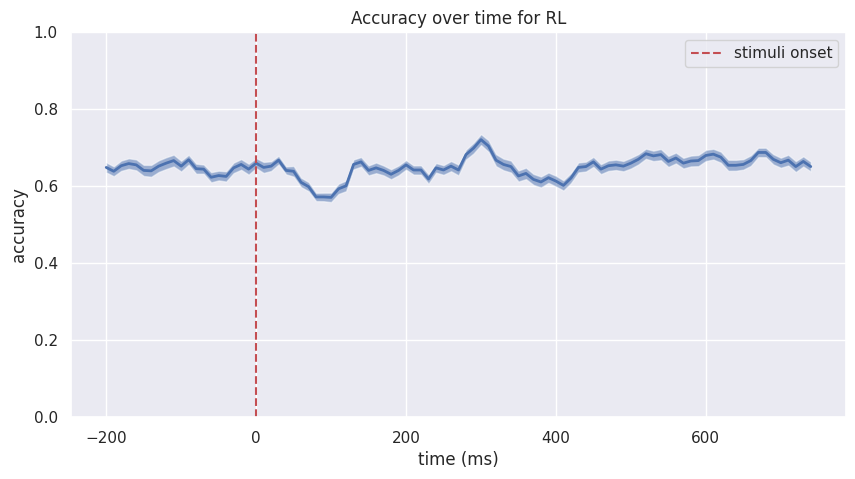

In [24]:
felineData   = felineRLDataArray
treeData     = treeRLDataArray
felineSpike  = np.reshape(felineData, (felineData.shape[1], felineData.shape[0], felineData.shape[2]))
treeSpike    = np.reshape(treeData, (treeData.shape[1], treeData.shape[0], treeData.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='RL', n_iter=100)

In [ ]:
felineSpike  = np.reshape(felineLMDataArray, (felineLMDataArray.shape[1], felineLMDataArray.shape[0], felineLMDataArray.shape[2]))
treeSpike    = np.reshape(treeLMDataArray, (treeLMDataArray.shape[1], treeLMDataArray.shape[0], treeLMDataArray.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='LM', n_iter=100)

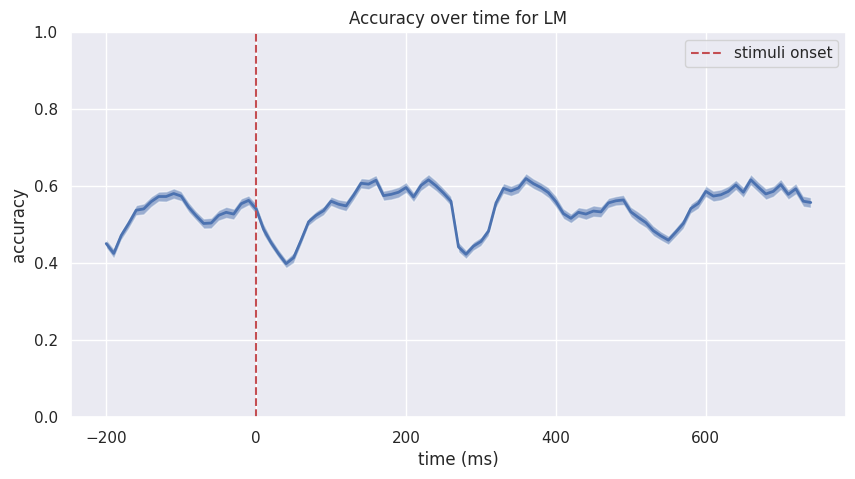

In [23]:
felineSpike  = np.reshape(felineLMDataArray, (felineLMDataArray.shape[1], felineLMDataArray.shape[0], felineLMDataArray.shape[2]))
treeSpike    = np.reshape(treeLMDataArray, (treeLMDataArray.shape[1], treeLMDataArray.shape[0], treeLMDataArray.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='LM', n_iter=100)

In [ ]:
felineSpike  = np.reshape(felineV1DataArray, (felineV1DataArray.shape[1], felineV1DataArray.shape[0], felineV1DataArray.shape[2]))
treeSpike    = np.reshape(treeV1DataArray, (treeV1DataArray.shape[1], treeV1DataArray.shape[0], treeV1DataArray.shape[2]))
lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='V1', n_iter=100)

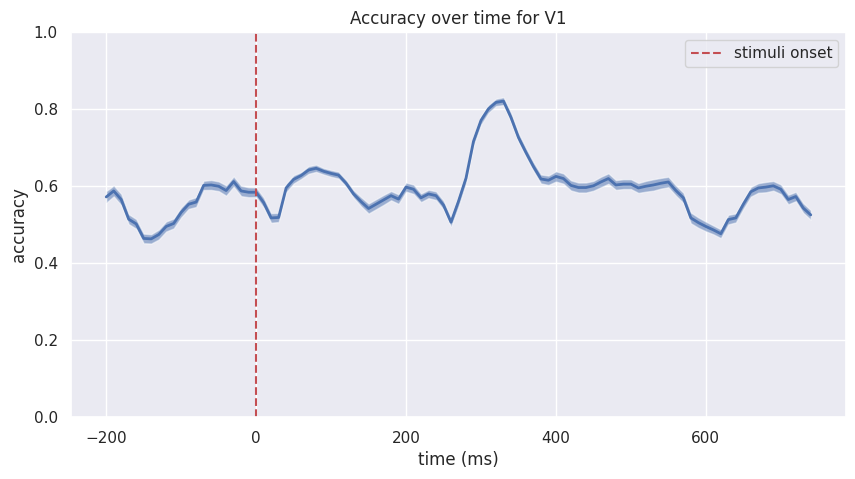

In [30]:
felineSpike  = np.reshape(felineV1DataArray, (felineV1DataArray.shape[1], felineV1DataArray.shape[0], felineV1DataArray.shape[2]))
treeSpike    = np.reshape(treeV1DataArray, (treeV1DataArray.shape[1], treeV1DataArray.shape[0], treeV1DataArray.shape[2]))
svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe='V1', n_iter=100)

# SVM

## N-iters

In [13]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import os
from natsort import natsorted

def svm_and_plot_iters(feline_data, tree_data, probe, n_iter):
    feline_labels = np.zeros(feline_data.shape[0]) 
    tree_labels   = np.ones(tree_data.shape[0])
    total_data    = np.concatenate((feline_data, tree_data), axis=0)
    total_labels  = np.concatenate((feline_labels, tree_labels), axis=0)

    iters    = n_iter
    accuracy = np.zeros((total_data.shape[2], iters))

    for iter in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(total_data, total_labels, test_size=0.3, stratify=total_labels)
        for t in range(accuracy.shape[0]):
            clf                  = make_pipeline(SVC(kernel='linear', C=2.5))
            clf.fit(X_train[:, :, t], y_train)
            y_pred               = clf.predict(X_test[:, :, t])
            accuracy[t, iter] = accuracy_score(y_test, y_pred)
        
    with open('/home/amirali/Desktop/Thesis/Codes/unit_data/Metrics/Accuracy/SVM/iters/' + probe + '_100iters.npy', 'wb') as f:
        np.save(f, accuracy)
        
    acc = accuracy
    accuracy = np.mean(acc, axis=1)
    error    = np.std(acc, axis=1) / np.sqrt(iters)
    time     = np.arange(-200, 750, 10)
    
    sns.set()
    plt.figure()
    plt.plot(time, accuracy, linewidth = 2)
    plt.fill_between(time, accuracy-error, accuracy+error, alpha=0.5)
    plt.xlabel('time (ms)')
    plt.ylabel('accuracy')
    plt.ylim(0, 1)
    plt.axvline(x = 0, ymin=0.1, ymax=0.9, color = 'r', label = 'stimuli onset', linestyle='dashed')
    plt.legend()
    plt.title('Accuracy over time for ' + probe)
    plt.savefig('/home/amirali/Desktop/Thesis/Codes/unit_data/Plots/SVM/iters/' + probe + '_100iters.png')

In [ ]:
dataDir   = '/home/amirali/Desktop/Thesis/Codes/unit_data/Data/'
felineDir = dataDir + 'feline_data/'
treeDir   = dataDir + 'tree_data/'

for numData in range(len(os.listdir(treeDir))):
    print(numData)
    felineSpike  = os.path.join(felineDir, natsorted(os.listdir(felineDir))[numData])
    treeSpike    = os.path.join(treeDir, natsorted(os.listdir(treeDir))[numData])
    probeName    = felineSpike.split("_")[-1].split(".")[0]
    probeRegion  = probDict[probeName]
    
    felineSpike  = np.load(felineSpike)
    felineSpike  = np.reshape(felineSpike, (felineSpike.shape[1], felineSpike.shape[0], felineSpike.shape[2]))
    treeSpike    = np.load(treeSpike)
    treeSpike    = np.reshape(treeSpike, (treeSpike.shape[1], treeSpike.shape[0], treeSpike.shape[2]))

    svm_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe=probeRegion, n_iter=100)

## Leave-p-Out

In [10]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import LeavePOut
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import os
from natsort import natsorted

def svm_and_plot_lpo(feline_data, tree_data, probe, p):
    feline_labels = np.zeros(feline_data.shape[0]) 
    tree_labels   = np.ones(tree_data.shape[0])
    total_data    = np.concatenate((feline_data, tree_data), axis=0)
    total_labels  = np.concatenate((feline_labels, tree_labels), axis=0)

    lpo      = LeavePOut(p)
    iters    = lpo.get_n_splits(total_data)
    accuracy = np.zeros((total_data.shape[2], iters))

    n_split = 0
    for train_index, test_index in lpo.split(total_data):
        X_train, X_test = total_data[train_index], total_data[test_index]
        y_train, y_test = total_labels[train_index], total_labels[test_index]
        for t in range(accuracy.shape[0]):
            clf                  = make_pipeline(SVC(kernel='linear', C=2.5))
            clf.fit(X_train[:, :, t], y_train)
            y_pred               = clf.predict(X_test[:, :, t])
            accuracy[t, n_split] = accuracy_score(y_test, y_pred)
        n_split = n_split + 1
        
    with open('/home/amirali/Desktop/Thesis/Codes/unit_data/Metrics/Accuracy/SVM/l2o/' + probe + '.npy', 'wb') as f:
        np.save(f, accuracy)
        
    acc = accuracy
    accuracy = np.mean(acc, axis=1)
    error    = np.std(acc, axis=1) / np.sqrt(iters)
    time     = np.arange(-200, 750, 10)
    
    sns.set()
    plt.figure()
    plt.plot(time, accuracy, linewidth = 2)
    plt.fill_between(time, accuracy-error, accuracy+error, alpha=0.5)
    plt.xlabel('time (ms)')
    plt.ylim(0, 1)
    plt.ylabel('accuracy')
    plt.axvline(x = 0, ymin=0.1, ymax=0.9, color = 'r', label = 'stimuli onset', linestyle='dashed')
    plt.legend()
    plt.title('Accuracy over time for ' + probe)
    plt.savefig('/home/amirali/Desktop/Thesis/Codes/unit_data/Plots/SVM/l2o/' + probe + '.png')

In [ ]:
dataDir   = '/home/amirali/Desktop/Thesis/Codes/unit_data/Data/'
felineDir = dataDir + 'feline_data/'
treeDir   = dataDir + 'tree_data/'

for numData in range(len(os.listdir(treeDir))):
    print(numData)
    felineSpike  = os.path.join(felineDir, natsorted(os.listdir(felineDir))[numData])
    treeSpike    = os.path.join(treeDir, natsorted(os.listdir(treeDir))[numData])
    probeName    = felineSpike.split("_")[-1].split(".")[0]
    probeRegion  = probDict[probeName]
    
    felineSpike  = np.load(felineSpike)
    felineSpike  = np.reshape(felineSpike, (felineSpike.shape[1], felineSpike.shape[0], felineSpike.shape[2]))
    treeSpike    = np.load(treeSpike)
    treeSpike    = np.reshape(treeSpike, (treeSpike.shape[1], treeSpike.shape[0], treeSpike.shape[2]))

    svm_and_plot_lpo(feline_data=felineSpike, tree_data=treeSpike, probe=probeRegion, p=2)

# LDA

## N-iters

In [33]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import os

def lda_and_plot_iters(feline_data, tree_data, probe, n_iter):
    feline_labels = np.zeros(feline_data.shape[0]) 
    tree_labels   = np.ones(tree_data.shape[0])
    total_data    = np.concatenate((feline_data, tree_data), axis=0)
    total_labels  = np.concatenate((feline_labels, tree_labels), axis=0)

    iters    = n_iter
    accuracy = np.zeros((total_data.shape[2], iters))

    for iter in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(total_data, total_labels, test_size=0.3, stratify=total_labels)
        for t in range(accuracy.shape[0]):
            clf                  = LinearDiscriminantAnalysis(solver='lsqr')
            clf.fit(X_train[:, :, t], y_train)
            y_pred               = clf.predict(X_test[:, :, t])
            accuracy[t, iter] = accuracy_score(y_test, y_pred)
        
    acc = accuracy
    accuracy = np.mean(acc, axis=1)
    error    = np.std(acc, axis=1) / np.sqrt(iters)
    time     = np.arange(-200, 750, 10)
    
    sns.set()
    plt.figure(figsize=(10, 5))
    plt.plot(time, accuracy, linewidth = 2)
    plt.fill_between(time, accuracy-error, accuracy+error, alpha=0.5)
    plt.xlabel('time (ms)')
    plt.ylabel('accuracy')
    plt.ylim(0, 1)
    plt.axvline(x = 0, ymin=0.1, ymax=0.9, color = 'r', label = 'stimuli onset', linestyle='dashed')
    plt.legend()
    plt.title('Accuracy over time for ' + probe)
    plt.savefig('/home/amirali/Desktop/Thesis/Codes/unit_data/Plots/LDA/100-iters-' + probe + '.png')

In [ ]:
dataDir   = '/home/amirali/Desktop/Thesis/Codes/unit_data/Data/'
felineDir = dataDir + 'feline_data/'
treeDir   = dataDir + 'tree_data/'

for numData in range(len(os.listdir(treeDir))):
    print(numData)
    felineSpike  = os.path.join(felineDir, natsorted(os.listdir(felineDir))[numData])
    treeSpike    = os.path.join(treeDir, natsorted(os.listdir(treeDir))[numData])
    probeName    = felineSpike.split("_")[-1].split(".")[0]
    probeRegion  = probDict[probeName]
    
    felineSpike  = np.load(felineSpike)
    felineSpike  = np.reshape(felineSpike, (felineSpike.shape[1], felineSpike.shape[0], felineSpike.shape[2]))
    treeSpike    = np.load(treeSpike)
    treeSpike    = np.reshape(treeSpike, (treeSpike.shape[1], treeSpike.shape[0], treeSpike.shape[2]))

    lda_and_plot_iters(feline_data=felineSpike, tree_data=treeSpike, probe=probeRegion, n_iter=100)

## Leave-p-Out

In [21]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import LeavePOut
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import os
from natsort import natsorted

def lda_and_plot_lpo(feline_data, tree_data, probe, p):
    feline_labels = np.zeros(feline_data.shape[0]) 
    tree_labels   = np.ones(tree_data.shape[0])
    total_data    = np.concatenate((feline_data, tree_data), axis=0)
    total_labels  = np.concatenate((feline_labels, tree_labels), axis=0)

    lpo      = LeavePOut(p)
    iters    = lpo.get_n_splits(total_data)
    accuracy = np.zeros((total_data.shape[2], iters))

    n_split = 0
    for train_index, test_index in lpo.split(total_data):
        X_train, X_test = total_data[train_index], total_data[test_index]
        y_train, y_test = total_labels[train_index], total_labels[test_index]
        for t in range(accuracy.shape[0]):
            clf                  = LinearDiscriminantAnalysis(solver='lsqr')
            clf.fit(X_train[:, :, t], y_train)
            y_pred               = clf.predict(X_test[:, :, t])
            accuracy[t, n_split] = accuracy_score(y_test, y_pred)
        n_split = n_split + 1
        
    with open('/home/amirali/Desktop/Thesis/Codes/unit_data/Metrics/Accuracy/LDA/l2o/' + probe + '.npy', 'wb') as f:
        np.save(f, accuracy)
        
    acc = accuracy
    accuracy = np.mean(acc, axis=1)
    error    = np.std(acc, axis=1) / np.sqrt(iters)
    time     = np.arange(-200, 750, 10)
    
    sns.set()
    plt.figure()
    plt.plot(time, accuracy, linewidth = 2)
    plt.fill_between(time, accuracy-error, accuracy+error, alpha=0.5)
    plt.xlabel('time (ms)')
    plt.ylim(0, 1)
    plt.ylabel('accuracy')
    plt.axvline(x = 0, ymin=0.1, ymax=0.9, color = 'r', label = 'stimuli onset', linestyle='dashed')
    plt.legend()
    plt.title('Accuracy over time for ' + probe)
    plt.savefig('/home/amirali/Desktop/Thesis/Codes/unit_data/Plots/LDA/l2o/' + probe + '.png')

In [ ]:
dataDir   = '/home/amirali/Desktop/Thesis/Codes/unit_data/Data/'
felineDir = dataDir + 'feline_data/'
treeDir   = dataDir + 'tree_data/'

for numData in range(len(os.listdir(treeDir))):
    print(numData)
    felineSpike  = os.path.join(felineDir, natsorted(os.listdir(felineDir))[numData])
    treeSpike    = os.path.join(treeDir, natsorted(os.listdir(treeDir))[numData])
    probeName    = felineSpike.split("_")[-1].split(".")[0]
    probeRegion  = probDict[probeName]
    
    felineSpike  = np.load(felineSpike)
    felineSpike  = np.reshape(felineSpike, (felineSpike.shape[1], felineSpike.shape[0], felineSpike.shape[2]))
    treeSpike    = np.load(treeSpike)
    treeSpike    = np.reshape(treeSpike, (treeSpike.shape[1], treeSpike.shape[0], treeSpike.shape[2]))

    lda_and_plot_lpo(feline_data=felineSpike, tree_data=treeSpike, probe=probeRegion, p=2)